In [1]:
from time import sleep
import Pyro5.api 
import matplotlib.pyplot as plt
from TimeTagger import *
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
file = 'C:/Users/HP/Downloads/TimeTags_PW_Ful_2025-02-06_153714.ttbin' #QD_29 (PW)

In [3]:
# Now we are going to print all the configuration of the TT-Ultra at the moment of the measurement
fr = FileReader(file)
config = fr.getConfiguration()

for key, value in config.items():
    print(f"{key}: {value}")

channel number scheme: 2
configure version: 1
current time: 2025-02-06 15:37:14 +0100
devices: [{'FPGA ID': 11493476189726804, 'PCB UID': '00fdf287', 'PCB version': '1.8 (1)', 'minimum software version': '2.10.6', 'model': 'Time Tagger Ultra', 'serial': '2410001ABQ'}]
firmware version: TT-Ultra, FW6, TS 2024-02-09 12:21:10, OK 1.46
fpga link: {'enabled': False}
hardware buffer size: 67108864
inputs: [{'average rising falling': [False, False], 'channel': [1, -1], 'conditional filter filtered': [False, False], 'conditional filter triggers': [False, False], 'deadtime': [2000, 2000], 'delay hardware': [0, 0], 'delay software': [0, 0], 'event divider': [1, 1], 'hardware delay compensation': [333, 333], 'high priority channel': [False, False], 'input hysteresis': 0, 'input impedance high': False, 'input mux': 0, 'normalization': [True, True], 'resolution': 'Standard', 'resolution rms': 42.0, 'trigger level': 0.5}, {'average rising falling': [False, False], 'channel': [2, -2], 'conditional fi

In [4]:
virtual_tagger = createTimeTaggerVirtual()
virtual_tagger.getConfiguration()

# measure photon antibunching
ch1 = config['registered channels'][0] # first photon channel for antibunching measurements
ch2 = config['registered channels'][1] # second photon channel for antibunching measurements

cr = Countrate(virtual_tagger, [ch1, ch2])

virtual_tagger.setReplaySpeed(-1.0) # Speed of -1.0 will replay the data as fast as possible
virtual_tagger.replay(file, begin = 0, duration = -1) # collect data until the end 
virtual_tagger.waitForCompletion()

print(f"Rate of counts channel {ch1} (counts/sec) : {cr.getData()[0]}")
print(f"Rate of counts channel {ch2} (counts/sec) : {cr.getData()[1]}")

Rate of counts channel 1 (counts/sec) : 4562.786636618219
Rate of counts channel 2 (counts/sec) : 4321.275676717165


In [5]:
def update_lifetime_total(lifetime_total, times_count, nbin_lifetime, bin_lifetime):
    total_time = nbin_lifetime * bin_lifetime  # Tiempo total del histograma
    
    for time in times_count:
        normalized_time = time % total_time  # Renormalización si excede el tiempo total
        bin_index = int(normalized_time // bin_lifetime)  # Índice del bin correspondiente
        lifetime_total[bin_index] += 1  # Actualización del array
    
    return lifetime_total

In [52]:
# Lifetime histograms
nbin_lifetime = 1000
bin_lifetime = 102 #ps

In [58]:
fr = FileReader(file)
n = 1000

lifetime_total = [0] * nbin_lifetime

while (fr.hasData()):
    data = fr.getData(n).getTimestamps()
    lifetime_total = update_lifetime_total(lifetime_total, data, nbin_lifetime, bin_lifetime)

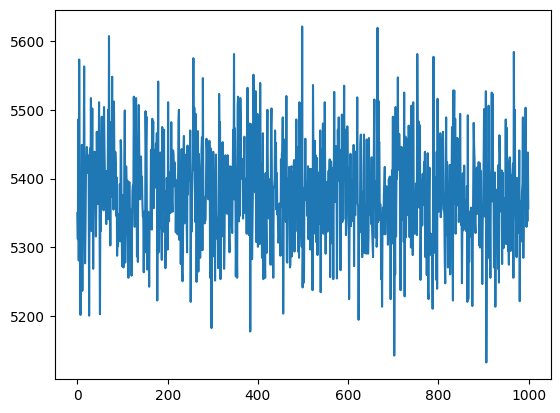

In [59]:
plt.plot(lifetime_total)
plt.show()

In [60]:
fr = FileReader(file)

In [69]:
n = 10000

lifetime_total = [0] * nbin_lifetime
lifetime_ON = [0] * nbin_lifetime
lifetime_OFF = [0] * nbin_lifetime

data = fr.getData(n).getTimestamps()
lifetime_total = update_lifetime_total(lifetime_total, data, nbin_lifetime, bin_lifetime)

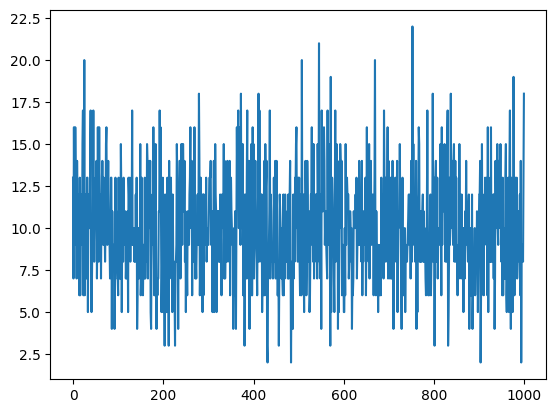

In [70]:
plt.plot(lifetime_total)
plt.show()